# ПІІС - Лабораторна робота №2
# Ал Хадам Мурат ІП-13

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')

## 1) Bayesian Classification + Support Vector Machine

In [41]:
data = 'adult.csv'
df = pd.read_csv(data, header=None, sep=',\s')

col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df.columns = col_names
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [42]:
df[['workclass', 'occupation', 'native_country']] = df[['workclass', 'occupation', 'native_country']].replace('?', np.NaN)

In [43]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [44]:
X = df.drop(['income'], axis=1)
y = df['income']

In [45]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

for df2 in [X_train, X_test]:
    df2['workclass'] = df2['workclass'].fillna(X_train['workclass'].mode()[0])
    df2['occupation'] = df2['occupation'].fillna(X_train['occupation'].mode()[0])
    df2['native_country'] = df2['native_country'].fillna(X_train['native_country'].mode()[0])

In [46]:
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
cols = X_train.columns

In [47]:
X_train

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
29,49,1,0,0,0,0,0,0,0,193366,...,0,0,0,0,0,0,0,0,0,0
12181,27,1,0,0,0,0,0,0,0,134152,...,0,0,0,0,0,0,0,0,0,0
18114,44,1,0,0,0,0,0,0,0,169980,...,0,0,0,0,0,0,0,0,0,0
4278,59,1,0,0,0,0,0,0,0,656036,...,0,0,0,0,0,0,0,0,0,0
12050,54,1,0,0,0,0,0,0,0,188136,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,47,1,0,0,0,0,0,0,0,359461,...,0,0,0,0,0,0,0,0,0,0
5390,31,1,0,0,0,0,0,0,0,147215,...,0,0,0,0,0,0,0,0,0,0
860,18,1,0,0,0,0,0,0,0,216284,...,0,0,0,0,0,0,0,0,0,0
15795,50,0,0,1,0,0,0,0,0,54261,...,0,0,0,0,0,0,0,0,0,0


In [48]:
from sklearn.preprocessing import RobustScaler


scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])

Bayesian Classification

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score, f1_score, accuracy_score


gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print(f'Recall score: {round(recall_score(y_test, y_pred, pos_label="<=50K"), 4)}')
print(f'F1 score: {round(f1_score(y_test, y_pred, pos_label="<=50K"), 4)}')
print(f'Accuracy score: {round(accuracy_score(y_test, y_pred), 4)}')

Recall score: 0.799
F1 score: 0.8621
Accuracy score: 0.8048


<Axes: >

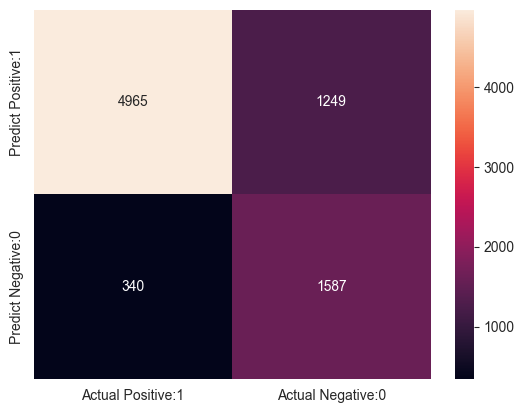

In [50]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                         index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d')

In [51]:
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.7974
Test set score: 0.8048


SVM

In [52]:
from sklearn.svm import SVC


svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(f'Recall score: {round(recall_score(y_test, y_pred, pos_label="<=50K"), 4)}')
print(f'F1 score: {round(f1_score(y_test, y_pred, pos_label="<=50K"), 4)}')
print(f'Accuracy score: {round(accuracy_score(y_test, y_pred), 4)}')

Recall score: 0.9731
F1 score: 0.8866
Accuracy score: 0.81


<Axes: >

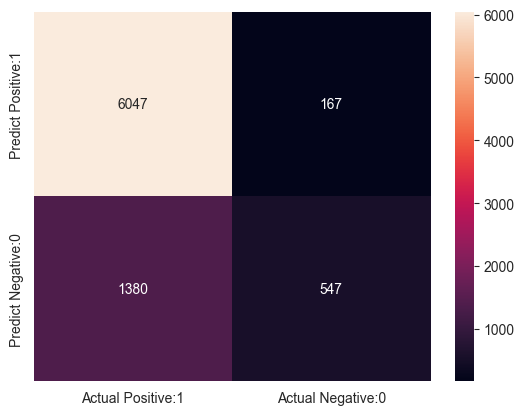

In [53]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                         index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d')

In [54]:
print('Training set score: {:.4f}'.format(svc.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(svc.score(X_test, y_test)))

Training set score: 0.7998
Test set score: 0.8100


## 2) K-Nearest Neighbors

In [55]:
from sklearn import preprocessing

df = pd.read_csv('teleCust1000t.csv')

X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']].values
y = df['custcat'].values

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Euclidean distance

In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(f'Recall score: {round(recall_score(y_test, y_pred, average="macro"), 4)}')
print(f'F1 score: {round(f1_score(y_test, y_pred, average="macro"), 4)}')
print(f'Accuracy score: {round(accuracy_score(y_test, y_pred), 4)}')

Recall score: 0.3105
F1 score: 0.3042
Accuracy score: 0.33


<Axes: >

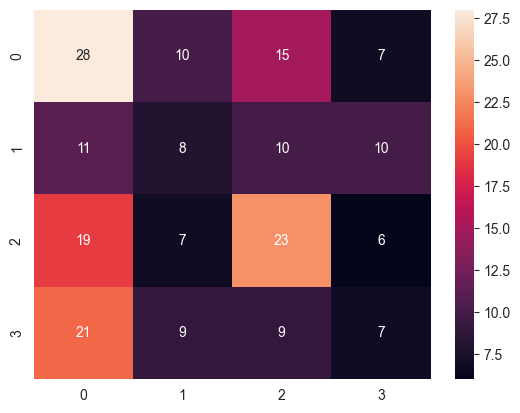

In [57]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm_matrix, annot=True, fmt='d')

In [58]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.5050
Test set score: 0.3300


In [59]:
values = pd.Series(y_test).value_counts()
print('Null accuracy score: {:.4f}'.format(values.max() / values.sum()))

Null accuracy score: 0.3000


Manhattan distance

In [60]:
knn = KNeighborsClassifier(n_neighbors=7, metric='manhattan')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(f'Recall score: {round(recall_score(y_test, y_pred, average="macro"), 4)}')
print(f'F1 score: {round(f1_score(y_test, y_pred, average="macro"), 4)}')
print(f'Accuracy score: {round(accuracy_score(y_test, y_pred), 4)}')

Recall score: 0.2903
F1 score: 0.2893
Accuracy score: 0.305


<Axes: >

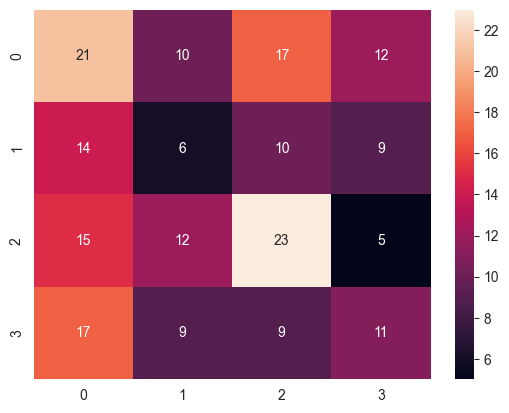

In [61]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm_matrix, annot=True, fmt='d')

In [62]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.5275
Test set score: 0.3050


In [63]:
values = pd.Series(y_test).value_counts()
print('Null accuracy score: {:.4f}'.format(values.max() / values.sum()))

Null accuracy score: 0.3000


Minkowski distance

In [64]:
knn = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(f'Recall score: {round(recall_score(y_test, y_pred, average="macro"), 4)}')
print(f'F1 score: {round(f1_score(y_test, y_pred, average="macro"), 4)}')
print(f'Accuracy score: {round(accuracy_score(y_test, y_pred), 4)}')

Recall score: 0.3105
F1 score: 0.3042
Accuracy score: 0.33


<Axes: >

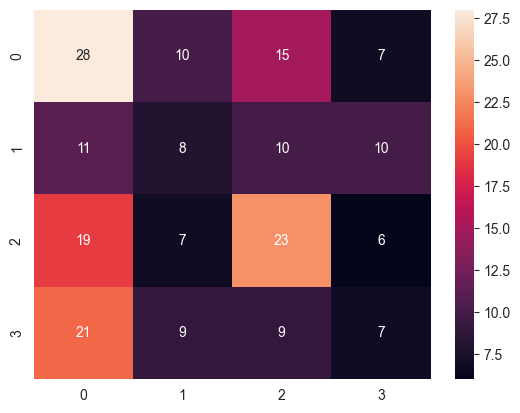

In [65]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm_matrix, annot=True, fmt='d')

In [66]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.5050
Test set score: 0.3300


## 3) Agnes,Birch,DBSCAN

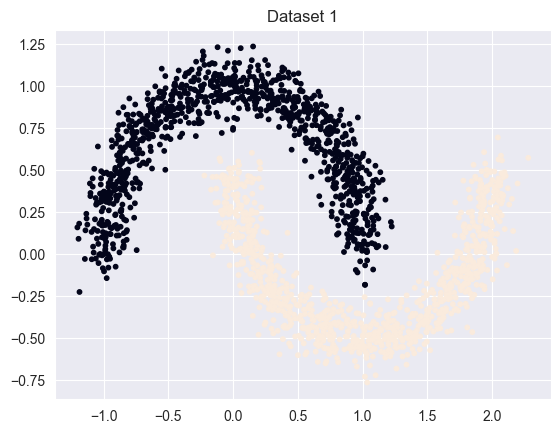

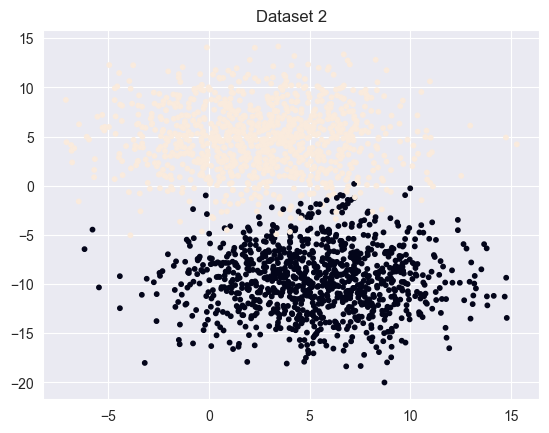

In [67]:
from sklearn import datasets
from sklearn.datasets import make_blobs

X1, Y1 = datasets.make_moons(n_samples=2000, noise=0.09, random_state=10)
plt.scatter(X1[:, 0], X1[:, 1], s=10, c=Y1)
plt.title('Dataset 1')
plt.show()

X3, Y3 = make_blobs(n_samples=2000, cluster_std=3.5, centers=2, n_features=2, random_state=10)
plt.title('Dataset 2')
plt.scatter(X3[:, 0], X3[:, 1], s=10, c=Y3)
plt.show()

Agnes

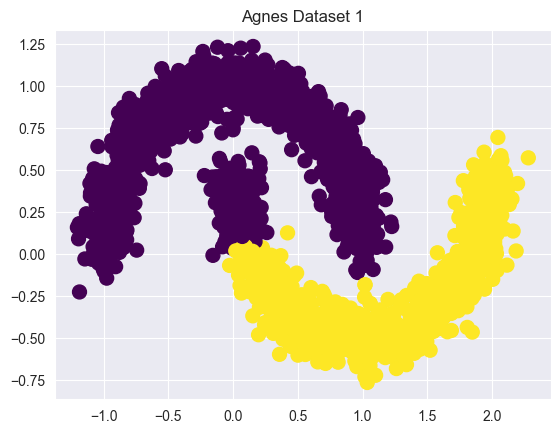

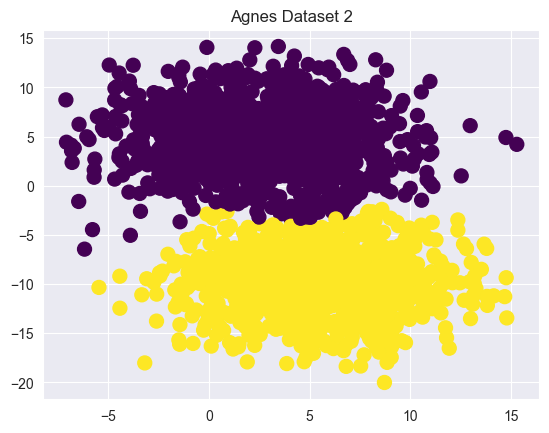

In [68]:
from sklearn.cluster import AgglomerativeClustering

agnes_1 = AgglomerativeClustering(n_clusters=2)
y_agnes_1 = agnes_1.fit_predict(X1)

agnes_2 = AgglomerativeClustering(n_clusters=2)
y_agnes_2 = agnes_2.fit_predict(X3)

plt.scatter(X1[:, 0], X1[:, 1], s=100, c=y_agnes_1, cmap='viridis')
plt.title('Agnes Dataset 1')
plt.show()

plt.scatter(X3[:, 0], X3[:, 1], s=100, c=y_agnes_2, cmap='viridis')
plt.title('Agnes Dataset 2')
plt.show()

In [69]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score


print('Dataset 1 - Silhouette Score: {:.4f}'.format(silhouette_score(X1, y_agnes_1)))
print('Dataset 2 - Silhouette Score: {:.4f}'.format(silhouette_score(X3, y_agnes_2)))

print('\nDataset 1 - ARI Score: {:.4f}'.format(adjusted_rand_score(Y1, y_agnes_1)))
print('Dataset 2 - ARI Score: {:.4f}'.format(adjusted_rand_score(Y3, y_agnes_2)))

print('\nDataset 1 - NMI Score: {:.4f}'.format(normalized_mutual_info_score(Y1, y_agnes_1)))
print('Dataset 2 - NMI Score: {:.4f}'.format(normalized_mutual_info_score(Y3, y_agnes_2)))

Dataset 1 - Silhouette Score: 0.4062
Dataset 2 - Silhouette Score: 0.5878

Dataset 1 - ARI Score: 0.7156
Dataset 2 - ARI Score: 0.9082

Dataset 1 - NMI Score: 0.6714
Dataset 2 - NMI Score: 0.8427


Birch

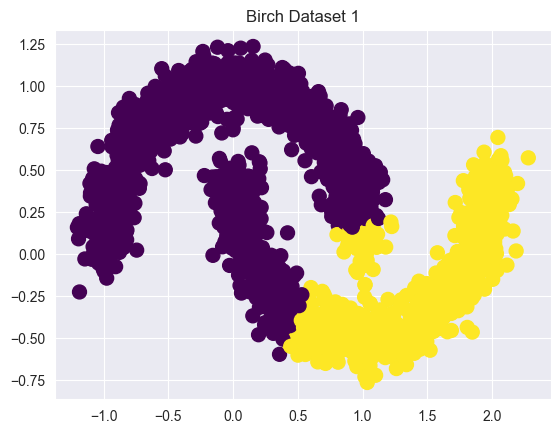

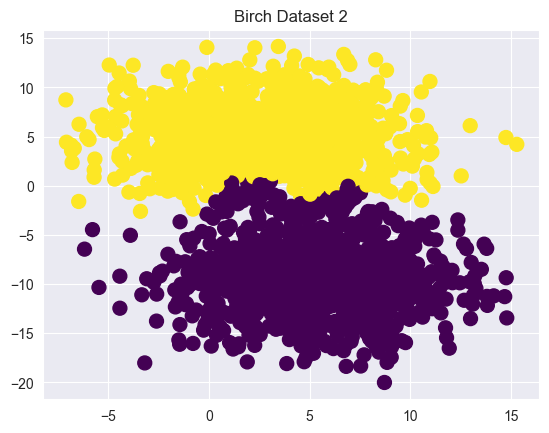

In [70]:
from sklearn.cluster import Birch


birch_1 = Birch(n_clusters=2, threshold=0.5, branching_factor=100)
y_birch_1 = birch_1.fit_predict(X1)

birch_2 = Birch(n_clusters=2, threshold=0.1, branching_factor=100)
y_birch_2 = birch_2.fit_predict(X3)

plt.scatter(X1[:, 0], X1[:, 1], s=100, c=y_birch_1, cmap='viridis')
plt.title('Birch Dataset 1')
plt.show()

plt.scatter(X3[:, 0], X3[:, 1], s=100, c=y_birch_2, cmap='viridis')
plt.title('Birch Dataset 2')
plt.show()

In [71]:
print('Dataset 1 - Silhouette Score: {:.4f}'.format(silhouette_score(X1, y_agnes_1)))
print('Dataset 2 - Silhouette Score: {:.4f}'.format(silhouette_score(X3, y_agnes_2)))

print('\nDataset 1 - ARI Score: {:.4f}'.format(adjusted_rand_score(Y1, y_agnes_1)))
print('Dataset 2 - ARI Score: {:.4f}'.format(adjusted_rand_score(Y3, y_agnes_2)))

print('\nDataset 1 - NMI Score: {:.4f}'.format(normalized_mutual_info_score(Y1, y_agnes_1)))
print('Dataset 2 - NMI Score: {:.4f}'.format(normalized_mutual_info_score(Y3, y_agnes_2)))

Dataset 1 - Silhouette Score: 0.4062
Dataset 2 - Silhouette Score: 0.5878

Dataset 1 - ARI Score: 0.7156
Dataset 2 - ARI Score: 0.9082

Dataset 1 - NMI Score: 0.6714
Dataset 2 - NMI Score: 0.8427


DBSCAN

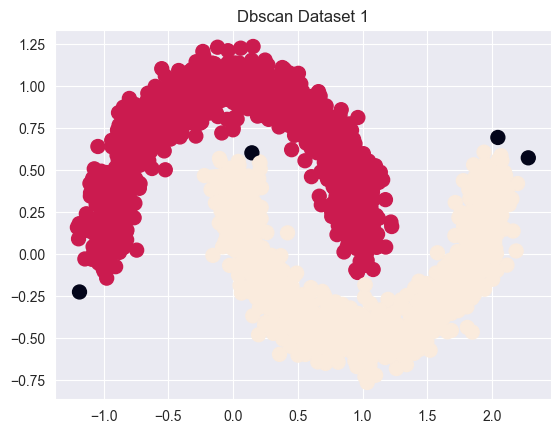

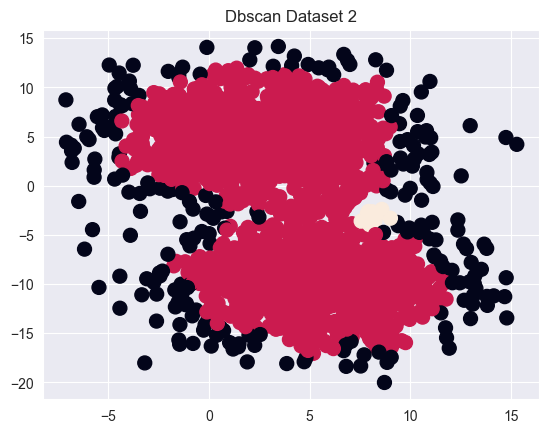

In [72]:
from sklearn.cluster import DBSCAN

dbscan_1 = DBSCAN(eps=0.2, min_samples=70)
y_dbscan_1 = dbscan_1.fit_predict(X1)

dbscan_2 = DBSCAN(eps=1, min_samples=10)
y_dbscan_2 = dbscan_2.fit_predict(X3)

plt.scatter(X1[:, 0], X1[:, 1], s=100, c=y_dbscan_1)
plt.title('Dbscan Dataset 1')
plt.show()

plt.scatter(X3[:, 0], X3[:, 1], s=100, c=y_dbscan_2)
plt.title('Dbscan Dataset 2')
plt.show()

In [73]:
print('Dataset 1 - Silhouette Score: {:.4f}'.format(silhouette_score(X1, y_agnes_1)))
print('Dataset 2 - Silhouette Score: {:.4f}'.format(silhouette_score(X3, y_agnes_2)))

print('\nDataset 1 - ARI Score: {:.4f}'.format(adjusted_rand_score(Y1, y_agnes_1)))
print('Dataset 2 - ARI Score: {:.4f}'.format(adjusted_rand_score(Y3, y_agnes_2)))

print('\nDataset 1 - NMI Score: {:.4f}'.format(normalized_mutual_info_score(Y1, y_agnes_1)))
print('Dataset 2 - NMI Score: {:.4f}'.format(normalized_mutual_info_score(Y3, y_agnes_2)))

Dataset 1 - Silhouette Score: 0.4062
Dataset 2 - Silhouette Score: 0.5878

Dataset 1 - ARI Score: 0.7156
Dataset 2 - ARI Score: 0.9082

Dataset 1 - NMI Score: 0.6714
Dataset 2 - NMI Score: 0.8427


## 4) Affinity propagation

In [74]:
mall_data = pd.read_csv('Mall_Customers.csv')
X_numerics = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

dbscan = DBSCAN(eps=12.6, min_samples=4)
y_dbscan = dbscan.fit_predict(X_numerics)

K-Means

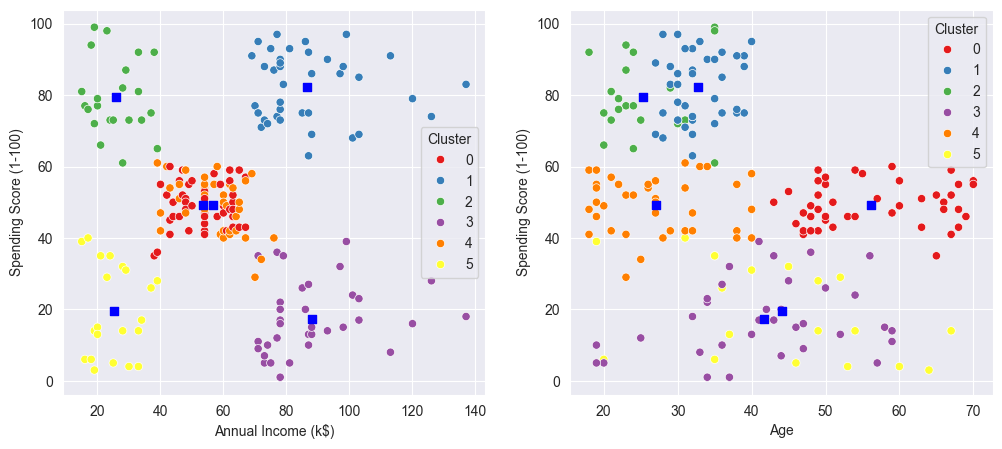

In [75]:
from sklearn.cluster import KMeans


k_means = KMeans(n_clusters=6, init='k-means++').fit(X_numerics)
k_means_clustered = X_numerics.copy()


k_means_clustered.loc[:, 'Cluster'] = k_means.labels_
fig11, (axes) = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=k_means_clustered,

hue='Cluster', ax=axes[0], palette='Set1', legend='full')
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=k_means_clustered,
hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 2], marker='s', s=40, c="blue")
axes[1].scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 2], marker='s', s=40, c="blue")
plt.show()

In [76]:
print(f'KMeans Silhouette Score: {round(silhouette_score(X_numerics, k_means.labels_), 4)}')
print(f'KMeans ARI Score:: {round(adjusted_rand_score(y_dbscan, k_means.labels_), 4)}')
print(f'KMeans NMI Score:: {round(normalized_mutual_info_score(y_dbscan, k_means.labels_), 4)}')

KMeans Silhouette Score: 0.4523
KMeans ARI Score:: 0.3538
KMeans NMI Score:: 0.5682


Affinity propagation

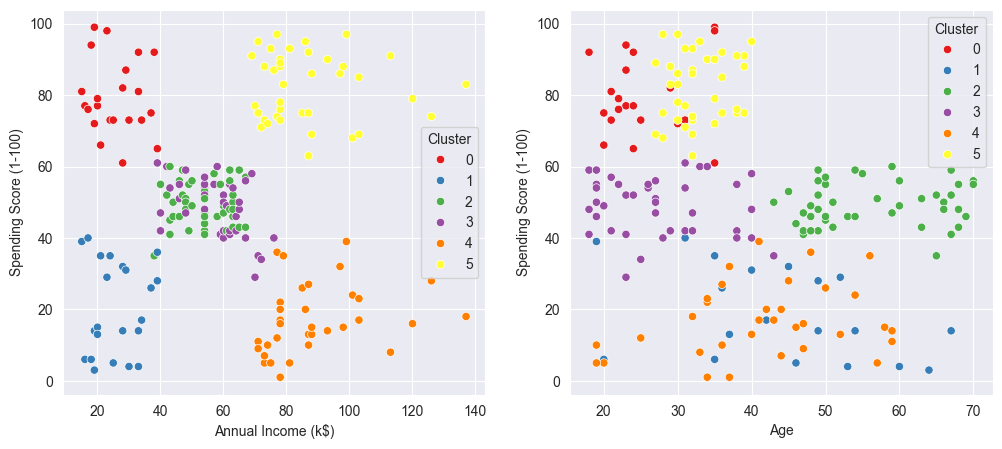

In [77]:
from sklearn.cluster import AffinityPropagation

af = AffinityPropagation(preference=-11800).fit(X_numerics)
af_clustered = X_numerics.copy()
af_clustered.loc[:, 'Cluster'] = af.labels_ # append labels to points

AF_clust_sizes = af_clustered.groupby('Cluster').size().to_frame()
AF_clust_sizes.columns = ["AF_size"]
fig3, (ax_af) = plt.subplots(1, 2, figsize=(12, 5))

scat_1 = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=af_clustered, hue='Cluster', ax=ax_af[0], palette='Set1', legend='full')
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=af_clustered, hue='Cluster', palette='Set1', ax=ax_af[1], legend='full')

plt.setp(ax_af[0].get_legend().get_texts(), fontsize='10')
plt.setp(ax_af[1].get_legend().get_texts(), fontsize='10')
plt.show()

In [78]:
print(f'Affinity propagation Silhouette Score: {round(silhouette_score(X_numerics, af.labels_), 4)}')
print(f'Affinity propagation ARI Score:: {round(adjusted_rand_score(y_dbscan, af.labels_), 4)}')
print(f'Affinity propagation NMI Score:: {round(normalized_mutual_info_score(y_dbscan, af.labels_), 4)}')

Affinity propagation Silhouette Score: 0.4516
Affinity propagation ARI Score:: 0.3562
Affinity propagation NMI Score:: 0.5737


Під час виконання лабораторної роботи ми досліджували основні методи машинного навчання. Серед них були такі як наївний баєсівський класифікатор, метод опорних векторів (SVM), метод найближчих сусідів (K Nearest Neighbors), а також алгоритми кластеризації, такі як Agnes, Birch, DBSCAN, K-Means і Affinity Propagation.

Ми також проводили візуалізацію кластерів даних та досліджували ключові метрики якості як для класифікації, так і для кластеризації. У кінцевому підсумку, ми порівнювали різні алгоритми машинного навчання, щоб визначити, який з них найбільше підходить для конкретної задачі або набору даних.